# Matching with Bias Correction, Outcome Regression, and Doubly Robust Estimation

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Matching Estimator with Bias Corretion - Abadie e Imbens (2011)
  * Aplicação no Python
* Outcome Regression
  * Aplicação no Python
* Doubly Robust Estimation
  * Aplicação no Python
* Boas Práticas


## Referências

* Abadie e Imbens (2011). Bias-Corrected Matching Estimators for Average Treatment Effects. Journal of Business & Economic Statistics, 29(1), 1-11.
* Heckman, James, Hidehiko Ichimura, Jefrey Smith, and Petra Todd. (1998). Characterizing selection bias using experimental data". Econometrica 66.5, pp. 1017-1098.
* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Courthoud, Matteo. Understanding AIPW. https://matteocourthoud.github.io/post/aipw/ 
* Matheus Facure. Doubly Robust Estimation. https://matheusfacure.github.io/python-causality-handbook/12-Doubly-Robust-Estimation.html
* Pearl, J. (2000). Causality: Models, reasoning, and inference. Cambridge University Press.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Morgan, S. L., & Winship, C. (2014). Counterfactuals and causal inference: Methods and principles for social research. Cambridge University Press. Capítulo 3.

**Pacotes Python**
* pyDRReg - Regressão Duplamente Robusta, Outcome Regression e Inverse Probability Weighting, com erro padrão bootstrap.
* Instalação: `pip install git+https://github.com/Daniel-Uhr/pyDRReg.git`

## Matching Estimator with Bias Corretion

**Abadie e Imbens (2011)** introduziram técnicas de correção de viés com estimadores de correspondência **quando há discrepâncias de correspondência em amostras finitas**. A correspondência é tendenciosa devido a essas discrepâncias de correspondência deficientes. Então, vamos entender a sugestão dos autores.

$$ \widehat{\delta_{ATT}} = \frac{1}{N_{T}} \sum_{D_{i}=1} (Y_{i}-Y_{j(i)}) $$

onde cada $i$ e $j(i)$ unidades são combinadas, e $X_{i} \approx X_{j(i)}$ e $D_{j(i)}=0$. 

Definimos os resultados da expectativa condicional

$$ \mu^{0}(x) = E[Y | X=x, D=0] = E[Y^{0}|X=x] $$
$$ \mu^{1}(x) = E[Y | X=x, D=1] = E[Y^{1}|X=x] $$

Observe que essas são apenas as funções de resultado condicional esperadas com base na equação de comutação para os grupos de controle e de tratamento. Como sempre, escrevemos o valor observado em função dos resultados condicionais esperados e de algum elemento estocástico:

$$ Y_{i} = \mu^{D_{i}}(X_{i}) + \epsilon_{i} $$


Reescrevendo o estimador ATT usando o $\mu$ acima:

$$ \hat{\delta}_{ATT} = \frac{1}{N_{T}} \sum_{D_{i}=1} ( \mu^{1}(X_{i}) + \epsilon_{i}) - (\mu^{0}(X_{j(i)}) + \epsilon_{j(i)}) = \frac{1}{N_{T}} \sum_{D_{i}=1}( \mu^{1}(X_{i}) -  \mu^{0}(X_{j(i)})) + \frac{1}{N_{T}} \sum_{D_{i}=1}(\epsilon_{i} - \epsilon_{j(i)}) $$

Observe que a primeira igualdade é apenas o ATT com o elemento estocástico incluído na linha anterior. E a segunda igualdade reorganiza-a de modo a obtermos dois termos: o ATT estimado mais a diferença média nos termos estocásticos para a amostra correspondente.

Comparando o estimador $\widehat{\delta_{ATT}}$ com o verdadeiro $\delta_{ATT}$, Abadie e Imbens (2011) propuseram um estimador de correspondência com viés de correção (Bias Correction) para as diferenças das características observaveis ($X$) dado por:

$$ \hat{\delta}_{ATT}^{BC} = \frac{1}{N_{T}} \sum_{D_{i}=1} [(Y_{i} - Y_{j(i)}) - (\hat{\mu}^{0}(X_{i}) - \hat{\mu}^{0}(X_{j(i)}))] $$

onde o $\hat{\mu}^{0}(X)$ é uma estimativa OLS de $E[Y|X=x, D=0]$. Vejamos o exemplo.

### Exemplo

 Tabela 5.8: Exemplo de correspondência (para ilustrar a correção de viés)

| Unidade |   $Y^{1}$     |  $Y^{0}$     | $D$      |  $X $    |
|---------|--------|-------|--------|-------|
| 1       | 5      |       | 1      | 11    |
| 2       | 2      |       | 1      | 7     |
| 3       | 10     |       | 1      | 5     |
| 4       | 6      |       | 1      | 3     |
| 5       |        | 4     | 0      | 10    |
| 6       |        | 0     | 0      | 8     |
| 7       |        | 5     | 0      | 4     |
| 8       |        | 1     | 0      |  1    |

Observe que não podemos implementar a correspondência exata porque nenhuma das unidades do grupo de tratamento tem uma correspondência exata no grupo de controle. Em vez disso, usamos a correspondência do vizinho mais próximo, que simplesmente fará a correspondência de cada unidade de tratamento com a unidade do grupo de controle cujo valor da covariável é mais próximo daquele da própria unidade do grupo de tratamento. Mas, quando fazemos este tipo de correspondência, criamos necessariamente discrepâncias de correspondência , o que é simplesmente outra forma de dizer que as covariáveis ​​não são perfeitamente combinadas para todas as unidades. 

$$ \hat{\delta}_{ATT} = \frac{5-4}{4} + \frac{2-0}{4} + \frac{10-5}{4} + \frac{6-1}{4} = 3.25 $$

No entanto, o “algoritmo” do vizinho mais próximo cria a Tabela :

| Unidade |   $Y^{1}$     |  $Y^{0}$     | $D$      |  $X $    |
|---------|--------|-------|--------|-------|
| 1       | 5      | **4**      | 1      | 11    |
| 2       | 2      | **0**      | 1      | 7     |
| 3       | 10     | **5**      | 1      | 5     |
| 4       | 6      | **1**      | 1      | 3     |
| 5       |        | 4     | 0      | 10    |
| 6       |        | 0     | 0      | 8     |
| 7       |        | 5     | 0      | 4     |
| 8       |        | 1     | 0      |  1    |





### Aplicação no Python	

Se regredimos $X$ em $Y$, obtemos:

In [1]:
import pandas as pd
import statsmodels.formula.api as smf 

# DataFrame
df = pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/training_bias_reduction.dta")

reg = smf.ols('Y ~ X', data=df[df['D'] == 0]).fit()
print(reg.summary())

df['mu0']= reg.predict(df)
df

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.478
Method:                 Least Squares   F-statistic:                   0.03001
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.878
Time:                        14:34:04   Log-Likelihood:                -8.5398
No. Observations:                   4   AIC:                             21.08
Df Residuals:                       2   BIC:                             19.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0872      2.788      0.749      0.5

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,Unit,Y,D,X,mu0
0,1,5,1,11,2.876923
1,2,2,1,7,2.589744
2,3,10,1,5,2.446154
3,4,6,1,3,2.302564
4,5,4,0,10,2.805128
5,6,0,0,8,2.661538
6,7,5,0,4,2.374359
7,8,1,0,1,2.158974


Ou seja, 

$$ \hat{\mu^{0}}(X) = \hat{\beta_{0}} + \hat{\beta_{1}}X = 2.0872 - 0.0718X $$


| Unidade |   $Y^{1}$     |  $Y^{0}$     | $D$      |  $X $    | $\hat{\mu}^{0}(X)$ |
|---------|--------|-------|--------|-------|---------|
| 1       | 5      | 4      | 1      | 11    | 2.88     |
| 2       | 2      | 0      | 1      | 7     |  2.59    |
| 3       | 10     | 5      | 1      | 5     |  2.45    |
| 4       | 6      | 1      | 1      | 3     |  2.30    |
| 5       |        | **4**     | 0      | 10    |  **2.81**    |
| 6       |        | **0**     | 0      | 8     |  **2.66**  |
| 7       |        | **5**     | 0      | 4     |  **2.37**    |
| 8       |        | **1**     | 0      |  1    |  **2.16**    |


Agora, podemos calcular o estimador de correspondência com correção de viés (Bias Correction - BC):

$$ \hat{\delta}_{ATT}^{BC} = \frac{ (5-4) - (2.88 - 2.81)}{4} + \frac{ (2-0) - (2.59 - 2.66)}{4} + \frac{ (10-5) - (2.45 - 2.37)}{4} + \frac{ (6-1) - (2.30 - 2.16)}{4} = 3.195 $$


O valor encontrado de aproximadamente **3.20**, é ligeiramente inferior ao ATT não ajustado de **3,25**.

## Outcome Regression

O estimador de "Outcome Regression" também é conhecido como Regression Adjustment ou Augmented Regression. O estimador procura utilizar a ideia de resultados potenciais para estimar o efeito causal médio do tratamento. Basicamente, utiliza-se a regressão linear para modelar os grupos de tratamento e controle, e, a partir disso, estimar o efeito médio do tratamento. Vejamos como isso é feito.

Lembre-se que o modelo de regressão linear é dado por:

$$ Y = \alpha + \beta D + \gamma X + \epsilon $$

Considere $ Y $ como a variável dependente, $ D $ é a variável indicadora de tratamento (1 se o tratamento foi aplicado, 0 caso contrário), $ X $ são as covariáveis observáveis, e $ \epsilon $ é o termo de erro.

Se aplicamos a expectativa condicional em $D$, temos:
   
$$ E[Y|X, D=1] = \mu_{1}(X) + E[u_1|X, D=1]  $$

$$ E[Y|X, D=0] = \mu_{0}(X) + E[u_0|X, D=1]  $$

Então, no contexto de resultados potenciais, $\mu_{1}(X) $ e $ \mu_{0}(X) $ representam as **médias dos resultados potenciais** para os tratados e não tratados, respectivamente, dados $ X $. Os termos $ u_1 $ e $u_0 $ são termos de erro associados aos grupos de tratamento e controle, respectivamente.


Ao subtrair essas duas equações, obtemos:

$$ E[Y|X, D=1] - E[Y|X, D=0] = \mu_{1}(X) - \mu_{0}(X) + [E[u_1|X, D=1] - E[u_0|X, D=1] ] $$


No entanto, é importante notar que $ u_1 $ e $ u_0 $ são termos de erro esperados condicionados às covariáveis e ao status de tratamento. Por definição, temos:

   $$ E[u_1|X, D=1] = E[Y|X, D=1] - \mu_{1}(X) $$

   $$ E[u_0|X, D=0] = E[Y|X, D=0] - \mu_{0}(X) $$

Isso implica que $ u_1 $ e $ u_0 $ são **os desvios entre as expectativas condicionais observadas e as médias dos resultados potenciais**.


É possivel reescrever a diferença entre as médias condicionais como:

$$ E[Y|X, D=1] - E[Y|X, D=0] = \mu_{1}(X) - \mu_{0}(X) + [E[Y|X, D=1] - \mu_{1}(X)] - [E[Y|X, D=0] - \mu_{0}(X)] $$


**Outcome Regression - ATE**

Simplificando a notação, com $ Y_1 $ representando $ E[Y|X, D=1] $ e $ Y_0 $ representando $ E[Y|X, D=0] $, tomando a esperaça, temos:

$$ \hat{\beta}^{OR}_{ATE} = E[\mu_{1}(X) - \mu_{0}(X)] + E[(Y_{1} - \mu_{1}(X)) - (Y_{0} - \mu_{0}(X))] $$

Logo,  o termo $E[\mu_{1}(X) - \mu_{0}(X)] $ representa o efeito causal médio do tratamento ajustado pelas covariáveis $ X $. O segundo termo, $ E[(Y_{1} - \mu_{1}(X)) - (Y_{0} - \mu_{0}(X))] $, deveria, em teoria, ser zero se os erros $ u_1 $ e $ u_0 $ tiverem expectativa zero. Em um experimento controlado, esperaríamos que $E[Y_{1} - \mu_{1}(X)] = 0$ e $E[Y_{0} - \mu_{0}(X)] = 0$, o que simplificaria a expressão para o efeito causal médio ajustado pelas covariáveis. 

Entretanto, desvios sistemáticos entre os grupos de tratados e controles podem ocorrer, principalmente, devido ao **viés de seleção** (Covariáveis podem estar desbalanceadas entre os grupos de tratamento e controle), ou, se houver variáveis não observadas que afetam os resultados. 

Portanto, em caso de um experimento, a expressão para o ATE, ajustado pelas covariáveis, deve simplificar para $ \hat{\beta}^{OR} = E[\mu_{1}(X) - \mu_{0}(X)] $. Isso mostra que a regressão linear pode ser usada para estimar o ATE, desde que o modelo seja corretamente especificado e os pressupostos de linearidade e ausência de viés dos erros sejam válidos.

**Outcome Regression - ATT**

Para obter o efeito médio do tratamento para os tratados, precisamos construir a ideia contrafactual. Ou seja, utilizamos a projeção do grupo de controle com as características X do grupo de tratamento para construir o contrafactual. Dessa forma a estimativa do efeito médio do tratamento para os tratados (ATT) é dada por:


   $$ \hat{\beta}^{OR}_{ATT} = E[\mu_{1}(X^{1}) - \mu_{0}(X^{1})] + E[(Y_{1} - \mu_{1}(X^{1})) - (Y_{0} - \mu_{0}(X^{1}))] $$

### Aplicação no Python	

Vamos fazer um exemplo prático no Python, com os dados das mães fumantes e não fumantes durante a gestação, e o peso dos bebês ao nascer. 

Primeiramente farei os códigos na "mão", e depois utilizarei o pacote pyDRReg.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

# Criar a variável de resultado
df['Y'] = df['bweight']

# Crie a variável 'Treated' com valor inicial de 0
df['Treated'] = 0
# Recodifique 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df.loc[df['mbsmoke'] == 'smoker', 'Treated'] = 1

# Criar variáveis de controle
df['Mmarried'] = 0
df.loc[df['mmarried'] == 'married', 'Mmarried'] = 1
df['casada'] = 0
df.loc[df['mmarried']=='married', 'casada'] = 1

Após carregar os dados vamos tentar aplicar o Outcome Regression para estimar o ATE.

```python

**Outcome Regression - ATE**

In [3]:
def OR_ate(df, X_cols, T_col, Y_col):
    X_np = df[X_cols].values  # Converter X para numpy array
    T_np = df[T_col].values  # Converter T para numpy array
    Y_np = df[Y_col].values  # Converter Y para numpy array
    # Essas linhas convertem as colunas de interesse do DataFrame (df) em arrays numpy, o que facilita a manipulação e os cálculos subsequentes.
        
    # Ajustar regressão linear para não tratados (D=0)
    model_0 = LinearRegression().fit(X_np[T_np==0], Y_np[T_np==0])
    mu0 = model_0.predict(X_np)
    # Aqui, ajusta-se um modelo de regressão linear para as observações que não receberam o tratamento (T_np == 0). Em seguida, são feitas previsões (mu0) para todas as observações com base neste modelo.
    
    # Ajustar regressão linear para tratados (D=1)
    model_1 = LinearRegression().fit(X_np[T_np==1], Y_np[T_np==1])
    mu1 = model_1.predict(X_np)
    # Da mesma forma, ajusta-se um modelo de regressão linear para as observações que receberam o tratamento (T_np == 1) e são feitas previsões (mu1) para todas as observações com base neste modelo.
    
    # Calcular o efeito causal médio
    effect = np.mean(mu1 - mu0)
    # Calcula-se a diferença média entre as previsões dos modelos para tratados e não tratados, resultando em uma estimativa preliminar do efeito causal médio
    
    # Calcular os desvios para todas as observações
    deviations = (Y_np - (T_np * mu1 + (1 - T_np) * mu0))
    # Os desvios são calculados como a diferença entre os valores observados de Y e as previsões ponderadas dos modelos de tratados e não tratados.
    
    # Calcular a média dos desvios
    deviations_mean = np.mean(deviations)
    # Calcula-se a média dos desvios, que é usada para ajustar a estimativa do efeito causal médio.
    
    # Calcular o OR
    OR_ate_estimate = effect + deviations_mean
    
    return OR_ate_estimate

# Definir as colunas de interesse
T_col = 'Treated'
Y_col = 'Y'
X_cols = ['casada', 'mage', 'medu']

# Calcular o OR
result_OR_ate = OR_ate(df, X_cols, T_col, Y_col)
print("Outcome Regression Estimate - ATE (OR - ATE):", result_OR_ate)

Outcome Regression Estimate - ATE (OR - ATE): -236.52788533678506


O resultado da estimativa de ATE (Average Treatment Effect) usando a técnica de Outcome Regression é de aproximadamente -236.53. Isso significa que, em média, o efeito do fumo durante a gestação sobre o resultado $Y$ (peso dos bebês ao nascer) é uma redução de aproximadamente 236.53 gramas.

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def OR_att(df, X_cols, T_col, Y_col):
    # Separar dados tratados (D=1) e não tratados (D=0)
    X_treated = df[df[T_col] == 1][X_cols]
    Y_treated = df[df[T_col] == 1][Y_col]
    X_control = df[df[T_col] == 0][X_cols]
    Y_control = df[df[T_col] == 0][Y_col]

    # Ajustar modelos de regressão linear
    model_treated = LinearRegression().fit(X_treated, Y_treated)
    model_control = LinearRegression().fit(X_control, Y_control)

    # Calcular previsões para tratados e não tratados
    mu1_X = model_treated.predict(X_treated)
    mu0_X = model_control.predict(X_treated)  # Usando X_treated para manter o contrafactual consistente

    # Calcular desvios para todas as observações
    deviations_treated = Y_treated - mu1_X
    deviations_control = Y_control - model_control.predict(X_control)

    # Calcular a média dos desvios tratados e não tratados
    deviations_mean_treated = deviations_treated.mean()
    deviations_mean_control = deviations_control.mean()

    # Calcular a média geral dos desvios
    deviations_mean = deviations_treated.mean()  # Considerando apenas os tratados para o ATT

    # Calcular ATT
    OR_att_estimate = (mu1_X.mean() - mu0_X.mean()) + deviations_mean

    return OR_att_estimate

T_col = 'Treated'
Y_col = 'Y'
X_cols = ['casada', 'mage', 'medu']

result_OR_att = OR_att(df, X_cols, T_col, Y_col)
print("Outcome Regression (ATT):", result_OR_att)


Outcome Regression (ATT): -215.24538690027902


Fazendo a análise de forma mais fácil, pelo pacote pyDRReg, encontramos os mesmos resultados

**Outcome Regression - ATT**

In [5]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

OR_att = pyDRReg(df, X_vars, T_var, Y_var, method='att', estimator='OR', n_bootstrap=50, seed=44)

print(OR_att.summary())

         Metric       Value
0     Estimator          OR
1        Method         ATT
2      Estimate -215.245387
3  bootstrap_SE   22.410568
4        t-stat   -9.604638
5       p-value         0.0
6      CI Lower   -259.1701
7      CI Upper -171.320674


**Outcome Regression - ATE**

In [6]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

OR_ate = pyDRReg(df, X_vars, T_var, Y_var, method='ate', estimator='OR', n_bootstrap=50, seed=44)

print(OR_ate.summary())

         Metric       Value
0     Estimator          OR
1        Method         ATE
2      Estimate -236.527885
3  bootstrap_SE   24.192087
4        t-stat   -9.777077
5       p-value         0.0
6      CI Lower -283.944375
7      CI Upper -189.111396


O resultado da estimativa de ATT (Average Treatment Effect on the Treated) usando a técnica de Outcome Regression é de aproximadamente -215.25; Isso significa que, em média, o efeito do fumo durante a gestação sobre o resultado $Y$ (peso dos bebês ao nascer) é uma redução de aproximadamente 215.25 gramas para os tratados.

## Doubly Robust Estimation (DR)

A estimativa duplamente robusta combina uma forma de "Outcome Regression" com um modelo de ponderação (ou seja, utilizando o escore de propensão) para estimar o efeito causal sobre um resultado. Quando usados individualmente para estimar um efeito causal, os métodos de regressão de resultados e escore de propensão são não enviesados apenas se o modelo estatístico for especificado corretamente. O **estimador duplamente robusto** combina estas 2 abordagens de modo que apenas 1 dos 2 modelos precisa ser especificado corretamente para obter um estimador de efeito não-viesado.

A especificação correta do modelo de regressão é um pressuposto fundamental na análise econométrica. Quando o objetivo é ajustar o fator de confusão, o estimador é consistente (e, portanto, assintoticamente não-enviesado) se o modelo refletir as verdadeiras relações entre a exposição e os fatores de confusão com o resultado. Na prática, nunca poderemos saber se algum modelo específico representa com precisão essas relações. **A estimativa duplamente robusta combina regressão de resultados com ponderação pelo escore de propensão (PS), de modo que o estimador seja robusto à especificação incorreta de um (mas não de ambos) desses modelos.

**Outcome Regression Approach**

Vimos que:

$$ \hat{\beta}_{ATE}^{OR} = E[\mu_{1}(X) - \mu_{0}(X)] + E[(Y_{1} - \mu_{1}(X)) - (Y_{0} - \mu_{0}(X))] $$

e

$$ \hat{\beta}^{OR}_{ATT} = E[\mu_{1}(X^{1}) - \mu_{0}(X^{1})] + E[(Y_{1} - \mu_{1}(X^{1})) - (Y_{0} - \mu_{0}(X^{1}))] $$




**Approach de Inverse Probability Weighting (IPW)**

Nesta abordagem, o viés de confusão é ajustado por meio de técnicas de matching (pareamento) e ponderação pelo escore de propensão (Peso = $W$). As ponderações são calculadas da seguinte forma:

$$ W_{ATE} = \frac{D}{\hat{p}(X)} + \frac{1-D}{1-\hat{p}(X)} $$

e,

$$ W_{ATT} = D + (1-D)\frac{\hat{p}(X)}{1-\hat{p}(X)} $$


**Approach do Doubly Robust Estimation (DR)**

A abordagem Doubly Robust Estimation (DR) combina as vantagens das abordagens de Outcome Regression e de Ponderação pela Probabilidade Inversa. Isso proporciona uma maior robustez aos resultados. Os estimadores duplamente robustos para o Average Treatment Effect (ATE) e o Average Treatment Effect on the Treated (ATT) são dados pelas seguintes fórmulas:

* **Doubly Robust Estimation for Average Treatment Effect (ATE)**

$$ \hat{\beta_{ATE}^{DR}} =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) \right] + \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.(Y_{1} - \mu_1 (X)) - \frac{(1-D)}{1-\hat{p}(X)}.(Y_{0} - \mu_0 (X)) \right] $$

* **Doubly Robust Estimation for Average Treatment Effect on the Treated (ATT)**

$$ \hat{\beta_{ATT}^{DR}} = \mathbb{E} \left[ (\mu_1 (X) - \mu_0 (X)) \right] + \mathbb{E} \left[ D(Y - \mu_1 (X)) - \frac{(1-D)\hat{p}(X)}{1-\hat{p}(X)}.(Y - \mu_0 (X)) \right] $$

Repare que realizamos um "ajuste" nos resíduos da regressão de resultados, ponderando-os pelo escore de propensão. Isso garante que o estimador seja robusto à especificação incorreta de um dos modelos. O "ajuste" é essencialmente um estimador IPW realizado sobre os resíduos.

Por isso que o Doubly Robust Estimation também é conhecido como Augmented Inverse Probability Weighting (AIPW).

**Por que a o estimador Duplamente Robusto (*Augmented Inverse Probability Weighting* - AIPW) é tão atraente?**

A razão é que só precisamos de uma das duas previsões, *$\hat{\mu}$* ou *$\hat{p}$*, para que a estimativa seja correta (não enviesada/imparcial). 
* Se ambos os modelos estiverem corretos, o estimador será mais eficiente do que qualquer um dos modelos sozinho. 
* Se um dos modelos estiver errado, o estimador ainda será consistente, desde que o outro modelo esteja correto. 

Isso é uma grande vantagem em relação a outras abordagens, como a regressão de resultados ou a ponderação pelo escore de propensão, que exigem que ambos os modelos estejam corretos para que o estimador seja consistente.

Suponha que $\hat{\mu}$ esteja especificado corretamente. Então $E[\hat{\mu}^{d}(x)=E[Y|X=x, D=d]$ , então o estimador DR é consistente, mesmo que o modelo de propensão $\hat{p}$ esteja mal especificado.

$$ \hat{\beta^{DR}} =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) +  \frac{D}{\hat{p}(X)}.(Y_{1} - \mu_1 (X)) - \frac{(1-D)}{1-\hat{p}(X)}.(Y_{0} - \mu_0 (X)) \right] = $$

$$  =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) \right] = $$

$$  =  \mathbb{E} \left[ Y^{1} - Y^{0} \right] = $$

$$ = \beta $$

A intuição é que, se $\hat{\mu}$ está especificado corretamente é imparcial e o fator de ajuste desaparece, uma vez que os resíduos convergem para zero.


Por outro lado, suponha $\hat{p}$ está especificado corretamente, ou seja, $E[\hat{p}(X)]=P(D=1|X)$, então o estimador DR é consistente, mesmo que o modelo de resultados $\hat{\mu}$ esteja mal especificado.

$$ \hat{\beta^{DR}} =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) +  \frac{D}{\hat{p}(X)}.(Y_{1} - \mu_1 (X)) - \frac{(1-D)}{1-\hat{p}(X)}.(Y_{0} - \mu_0 (X)) \right] = $$

$$ \mathbb{E} \left[ \mu_1(X) - \mu_0 (X) + \frac{D}{\hat{p}(X)}.Y_{1} - \frac{D}{\hat{p}(X)}.\mu_1 (X) - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \frac{(1-D)}{1-\hat{p}(X)}.\mu_0 (X) \right] = $$


$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \mu_1(X) - \frac{D}{\hat{p}(X)}.\mu_1 (X) + \frac{(1-D)}{1-\hat{p}(X)}.\mu_0 (X) - \mu_0 (X) \right] = $$


$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \mu_1(X) (1 - \frac{D}{\hat{p}(X)}) + \mu_0 (X)(\frac{(1-D)}{1-\hat{p}(X)} - 1) \right] = $$

$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \mu_1(X) (\frac{\hat{p}(X) - D}{\hat{p}(X)}) + \mu_0 (X)(\frac{(1-D)- (1-\hat{p}(X))}{1-\hat{p}(X)}) \right] = $$

$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} \right] = $$

$$ \mathbb{E} \left[ Y^{1} - Y^{0} \right] = $$

$$ = \beta $$

A intuição é que, se $\hat{p}$ está especificado corretamente, o $\hat{\beta}^{DR}$ é imparcial e o fator de ajuste desaparece, uma vez que os resíduos ($D_{i}-\hat{p}(X)$) convergem para zero.

### Aplicação em Python

Novamente, a ideia é mostrar todos os componentes da Estimação Duplamente Robusta, e realizar as estimações na "mão" e, posteriormente, com o pacote pyDRReg.

Primeiro precisamos estimar os componentes da Estimação Duplamente Robusta, "escore de propensão" ($p(X)$) e as funções de resposta ($\mu_{0}(X)$ e $\mu_{1}(X)$). Num primeiro momento vamos estimar o Propensity Score e estimar regressões ATE e ATE para o método de Propensity Score Weighting (PSW).

In [ ]:
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

Calculando o escore de propensão.

In [8]:
# Regressão Logística para estimar o escore de propensão
logit_model = smf.logit("Treated ~ 1 + casada + mage + medu", data=df).fit()
# Imprimindo o modelo
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.446546
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Treated   No. Observations:                 4642
Model:                          Logit   Df Residuals:                     4638
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                 0.07078
Time:                        16:28:30   Log-Likelihood:                -2072.9
converged:                       True   LL-Null:                       -2230.7
Covariance Type:            nonrobust   LLR p-value:                 3.853e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5894      0.230      2.564      0.010       0.139       1.040
casada        -1.0310      0.

In [9]:
# Salvando o escore de propensão no DataFrame
df['ps'] = logit_model.predict()

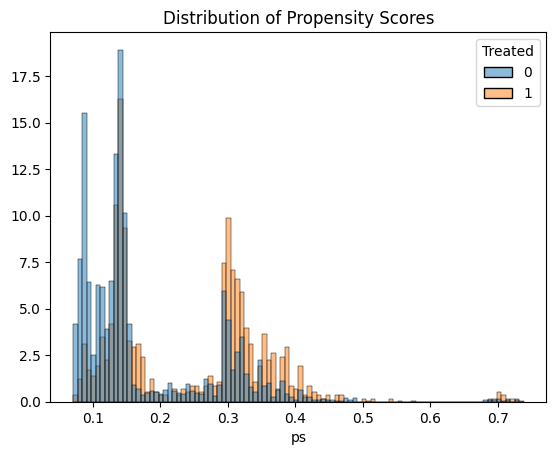

In [10]:
# Verificar graficamente a área de sobreposição
sns.histplot(data=df, x='ps', hue='Treated', bins=100, stat='density', common_norm=False).\
    set(ylabel="", title="Distribution of Propensity Scores");

Agora vamos calcular os pesos IPW para o ATE e ATT.

In [11]:
# Inverse Probability of Treatment Weight (IPTW)

# Peso para o efeito médio do tratamento (ATE)
df['W1'] = 1 / df['ps']
df.loc[df['Treated'] == 0, 'W1'] = 0
df['W2'] = 1 / (1 - df['ps'])
df.loc[df['Treated'] == 1, 'W2'] = 0

# Peso para o efeito médio do tratamento nos tratados (ATT)
df['W_ATE'] = df['W1'] + df['W2']
df['W_ATT'] = df['ps'] / (1 - df['ps'])
df.loc[df['Treated'] == 1, 'W_ATT'] = 1

A título de curiosidade, podemos estimar o efeito médio do tratamento para os tratados (ATT) e o efeito médio do tratamento (ATE) utilizando o método de Ponderação pelo Escore de Propensão (IPW). Para isso, basta rodar a regressão linear considerando como peso amostral os valores de $W_{ATE}$ e $W_{ATT}$, respectivamente.

In [19]:
#Propensity Score Weighting - ATE
psw_ate = smf.wls("Y ~ Treated", weights=df['W_ATE'], data=df).fit()
print(psw_ate.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.040
Model:                            WLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     194.9
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.03e-43
Time:                        21:04:19   Log-Likelihood:                -36594.
No. Observations:                4642   AIC:                         7.319e+04
Df Residuals:                    4640   BIC:                         7.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3401.1645     11.754    289.358      0.0

In [13]:
#Propensity Score Weighting - ATT
psw_att = smf.wls("Y ~ Treated", weights=df['W_ATT'], data=df).fit()
print(psw_att.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.032
Model:                            WLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     155.8
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           3.41e-35
Time:                        16:28:39   Log-Likelihood:                -37060.
No. Observations:                4642   AIC:                         7.412e+04
Df Residuals:                    4640   BIC:                         7.414e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3350.9689     12.014    278.924      0.0

Repare que podemos obter os mesmos resultados utilizando o pacote pyDRReg.

In [17]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

IPW_att = pyDRReg(df, X_vars, T_var, Y_var, method='att', estimator='IPW', n_bootstrap=50, seed=44)

print(IPW_att.summary())

         Metric       Value
0     Estimator         IPW
1        Method         ATT
2      Estimate -213.309168
3  bootstrap_SE   22.839909
4        t-stat   -9.339318
5       p-value         0.0
6      CI Lower -258.075389
7      CI Upper -168.542946


In [15]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

IPW_ate = pyDRReg(df, X_vars, T_var, Y_var, method='ate', estimator='IPW', n_bootstrap=50, seed=44)

print(IPW_ate.summary())

         Metric       Value
0     Estimator         IPW
1        Method         ATE
2      Estimate -234.437125
3  bootstrap_SE   23.479172
4        t-stat   -9.984897
5       p-value         0.0
6      CI Lower -280.456303
7      CI Upper -188.417947


Agora vamos calcular as funções de resposta "$\mu$".

In [20]:
def estimate_mu(df, X, D, y, model_mu):
    mu = model_mu.fit(df[X + [D]], df[y])
    mu0 = mu.predict(df[X + [D]].assign(Treated=0))
    mu1 = mu.predict(df[X + [D]].assign(Treated=1))
    return mu0, mu1

Vejamos o resultado da regressão linear com o estimador OLS

In [21]:
X = ['casada', 'mage', 'medu']
D = "Treated"
y = "Y"

mu0, mu1 = estimate_mu(df, X, D, y, LinearRegression())
ols = np.mean(mu1 - mu0)
print(ols)

-219.32345600264168


é o mesmo se utilizarmos a regressão linear com o smf do pacote statsmodels.

In [16]:
ols2 = smf.wls("Y ~ Treated + casada + mage + medu", data=df).fit()
print(ols2.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.055
Model:                            WLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     67.86
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           6.80e-56
Time:                        16:23:44   Log-Likelihood:                -35982.
No. Observations:                4642   AIC:                         7.197e+04
Df Residuals:                    4637   BIC:                         7.201e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3155.5036     51.413     61.376      0.0

Eu chamo atenção novamente que **o resultado do OLS é a diferença entre as funções de resposta. Isso será importante na abordagem futura de machine learning**. Agora temos tudo que precisamos para estimar o efeito médio do tratamento (ATE) e o efeito médio do tratamento para os tratados (ATT) utilizando a abordagem de Estimação Duplamente Robusta (DR).

**Estimativa Duplamente Robusta**

Agora temos todos os componentes para estimar o DR para ATE e o ATT, vamos fazer "na mão".

In [17]:
# DR-ATE
DR_ATE = mu1 - mu0 + df["Treated"] / df["ps"] * (df["Y"] - mu1) - (1-df["Treated"]) / (1-df["ps"]) * (df["Y"] - mu0)
print(np.mean(DR_ATE))

-229.19546059542853


In [18]:
# DR-ATT
DR_ATT = mu1 - mu0 + df["Treated"] * (df["Y"] - mu1) - (1-df["Treated"])*df["ps"] / (1-df["ps"]) * (df["Y"] - mu0)
print(np.mean(DR_ATT))

-218.94795582708


Podemos utilizar o pacote pyDRReg para obter os mesmos resultados.

In [22]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

DR_ate = pyDRReg(df, X_vars, T_var, Y_var, method='ate', estimator='DR', n_bootstrap=50, seed=44)

print(DR_ate.summary())

         Metric       Value
0     Estimator          DR
1        Method         ATE
2      Estimate -229.195464
3  bootstrap_SE   23.584023
4        t-stat   -9.718251
5       p-value         0.0
6      CI Lower  -275.42015
7      CI Upper -182.970779


In [23]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

DR_att = pyDRReg(df, X_vars, T_var, Y_var, method='att', estimator='DR', n_bootstrap=50, seed=44)

print(DR_att.summary())

         Metric       Value
0     Estimator          DR
1        Method         ATT
2      Estimate -218.947956
3  bootstrap_SE   22.000454
4        t-stat   -9.951974
5       p-value         0.0
6      CI Lower -262.068846
7      CI Upper -175.827066


Esse tipo de estimador é bastante importante na literatura. E já possui alguns estimadores que realizam as estimações de forma direta. Por exemplo, poderíamos computar diretamente com 'LinearDRLearner' da biblioteca 'EconML' da Microsoft (EconML - Estimate causal effects with ML).

obs: https://www.microsoft.com/en-us/research/project/econml/


In [17]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from econml.dr import LinearDRLearner

In [18]:
X = df[['casada', 'mage', 'medu']]

In [23]:
model = LinearDRLearner(model_propensity=LogisticRegression(), 
                        model_regression=LinearRegression(),
                        random_state=1)
model.fit(Y=df["Y"], T=df["Treated"], X=X);

In [24]:
model.ate_inference(X=X.values, T0=0, T1=1).summary().tables[0]

mean_point,stderr_mean,zstat,pvalue,ci_mean_lower,ci_mean_upper
-228.121,23.167,-9.847,0.0,-273.527,-182.714


O modelo nos dá diretamente o efeito médio do tratamento. A estimativa é estatisticamente diferente de zero e o intervalo de confiança inclui o valor verdadeiro de -229,17. Observe que obtivemos uma estimativa diferente porque a função **LinearDRLearner** também realizou o cross-fitting em segundo plano, o que não fizemos antes. Ele não calcula o ATT.

Outro pacote importante é o "causalml" (https://causalml.readthedocs.io/en/latest/about.html).



## Boas práticas

* Verifique o balanço das covariáveis.
  * Tanto o IPW quanto o DR (AIPW) foram desenvolvidos para ambientes nos quais o tratamento não é atribuído aleatoriamente incondicionalmente, mas pode depender de algumas variáveis observáveis. Essas informações podem ser verificadas de duas maneiras: 
    * (1) Produza uma tabela de médias/equilíbrio das covariáveis. Se a randomização incondicional não for válida, esperamos ver diferenças significativas entre alguns observáveis; 
    * (2) Trace os escores de propensão estimados. Se a randomização incondicional for válida, esperamos que os escores de propensão sejam constantes.
* Verifique a suposição de sobreposição.
  * Podemos simplesmente verificar os limites dos escores de propensão previstos. Se a suposição de sobreposição for violada, acabamos dividindo algum termo do estimador por zero.
* Usar o *cross-fitting* (ajuste cruzado quando estiver avaliando por machine learning).